In [1]:
import os
import sys
import shutil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
fig_plots = []

In [6]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [7]:
%run ../dataframes/provinces_gdf.ipynb -i
provinces_gdf = pd.read_pickle("{}/provinces_gdf.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/asl.ipynb -i
df_asl = pd.read_pickle("{}/df_asl.pkl".format(dataframes_path))

In [9]:
%run ../dataframes/dism_first_access.ipynb -i
df_dism_first_access = pd.read_pickle("{}/df_dism_first_access.pkl".format(dataframes_path))

In [10]:
%run ../datasets/dism_provincia_mapper.ipynb -i

In [11]:
dism_provincia_map

{'asst grande ospedale metropolitano nigua': 'MI',
 'asst santi paolo e carlo': 'MI',
 'asst fatebenefratelli sacco': 'MI',
 'azienda usl toscana nord-ovest': 'MS',
 'azienda ospedaliero-universitaria pisana': 'PI',
 'azienda ospedaliera universitaria senese': 'SI',
 'asst ovest milanese': 'MI',
 'asst nord milano': 'MI',
 'asst rhodense': 'MI',
 'asst melegnano e della martesana': 'MI',
 'asst di lodi': 'LO',
 'asst dei sette laghi': 'VA',
 'az.osp.universitaria integrata verona': 'VR',
 'asst della valle olona': 'VA',
 "asst della valtellina e dell'alto lario": 'SO',
 'asst di lecco': 'LC',
 'asst della brianza': 'MB',
 'asst di monza': 'MB',
 'asst lariana': 'CO',
 "azienda ospedale - universita' padova": 'PD',
 'asst della franciacorta': 'BS',
 'asst degli spedali civili di brescia': 'BS',
 'asst di bergamo ovest': 'BG',
 'asst di bergamo est': 'BG',
 'asst di cremona': 'CR',
 'asst del garda': 'BS',
 'asst della valcamonica': 'BS',
 'asst papa giovanni xxiii': 'BG',
 'asst di mant

In [12]:
newcmp = LinearSegmentedColormap.from_list("", ["#a3b18a", "#588157","#3a5a40"])

In [13]:
### Constants
OUTPUT_DIR = "output"
TARGET_GROUP = "Depressione"
TARGET_GROUP_TEXT = "Depressione"
YEAR = "2022"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [14]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [15]:
REGION_COLOURS = {
    "Nord": "#344e41", 
    "Centro": "#588157",
    "Sud e Isole": "#dad7cd",
}

In [16]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

In [17]:
folder = OUTPUT_DIR
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# prepare dataframe

In [18]:
df = df_dism_first_access.loc[df_dism_first_access["gruppo_diagnostico"] == TARGET_GROUP, [
    "codice_asl", 
    "descrizione_regione",
    "sesso",
    "numero_accessi",
    "asl"
]]

In [19]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,asl
4,203,PIEMONTE,Maschio,1606,to3
15,203,PIEMONTE,Femmina,3129,to3
26,204,PIEMONTE,Maschio,1557,to4
37,204,PIEMONTE,Femmina,2785,to4
48,205,PIEMONTE,Maschio,549,to5
...,...,...,...,...,...
2865,305,SARDEGNA,Femmina,344,asl n. 5 di oristano
2875,306,SARDEGNA,Maschio,70,asl n. 6 del medio campidano
2884,306,SARDEGNA,Femmina,128,asl n. 6 del medio campidano
2894,308,SARDEGNA,Maschio,604,asl n. 8 di cagliari


In [20]:
df_asl

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva
0,2010,10,PIEMONTE,201,to1,VIA S.SECONDO 29,10128,TORINO,TO,NaN,NaN,NaN,NaN,NaN
1,2010,10,PIEMONTE,202,to2,CORSO SVIZZERA 164,10149,TORINO,TO,NaN,NaN,NaN,NaN,NaN
2,2010,10,PIEMONTE,203,to3,VIA MARTIRI XXX APRILE 30,10093,COLLEGNO,TO,NaN,NaN,NaN,NaN,NaN
3,2010,10,PIEMONTE,204,to4,Via Po 11,10034,CHIVASSO,TO,NaN,NaN,NaN,NaN,NaN
4,2010,10,PIEMONTE,205,to5,VIA SAN DOMENICO 21,10023,CHIERI,TO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2024,200,SARDEGNA,304,asl n. 4 dell'ogliastra,VIA PISCINAS 1,8045,LANUSEI,NU,NaN,NaN,direzione.generale@aslogliastra.it,www.aslogliastra.it,1.620421e+09
1802,2024,200,SARDEGNA,305,asl n. 5 di oristano,VIA CARDUCCI 35,9170,ORISTANO,OR,NaN,NaN,direzione.generale@asloristano.it,nuovo.asloristano.it/a,1.258181e+09
1803,2024,200,SARDEGNA,306,asl n. 6 del medio campidano,VIA GIUSEPPE UNGARETTI 9,9025,SANLURI,SU,07093841,07093841,direzione.generale@aslmediocampidano.it,www.aslmediocampidano.it,3.990321e+09
1804,2024,200,SARDEGNA,307,asl n. 7 del sulcis,VIA DALMAZIA 83,9013,CARBONIA,SU,07816681,07816681,direzione.generale@aslsulcis.it,www.aslsulcis.it,3.990311e+09


In [21]:
df_asl.loc[(df_asl["comune"] == "LIVORNO"), ]

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva
79,2010,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN
225,2011,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN
370,2012,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN
515,2013,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN
655,2014,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN
794,2015,90,TOSCANA,106,livorno,VIA MONTEROTONDO 49,57100,LIVORNO,LI,NaN,NaN,NaN,NaN,NaN


In [22]:
df_asl = df_asl[["anno", "comune", "codice_azienda", "sigla_provincia", "denominazione_azienda"]]

In [23]:
df_asl = df_asl.groupby(['denominazione_azienda', "comune", "sigla_provincia"])['anno'].max().reset_index()

In [24]:
df_asl

,denominazione_azienda,comune,sigla_provincia,anno
0,a.s.l. avellino,AVELLINO,AV,2024
1,a.s.l. benevento,BENEVENTO,BN,2024
2,a.s.l. caserta,CASERTA,CE,2024
3,a.s.l. della provincia di bergamo,BERGAMO,BG,2015
4,a.s.l. della provincia di brescia,BRESCIA,BS,2015
...,...,...,...,...
209,verona,VERONA,VR,2016
210,versilia,CAMAIORE,LU,2015
211,versilia,VIAREGGIO,LU,2010
212,vicenza,VICENZA,VI,2016


In [25]:
df_asl.loc[(df_asl["comune"] == "LIVORNO"), ]

,denominazione_azienda,comune,sigla_provincia,anno
154,livorno,LIVORNO,LI,2015


In [26]:
provinces_gdf = provinces_gdf[["prov_acr", "geometry", "zone", "prov_name"]]

In [27]:
df = df.set_index("asl").join(df_asl.set_index("denominazione_azienda"))

In [28]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
to3,203,PIEMONTE,Maschio,1606,COLLEGNO,TO,2024.0
to3,203,PIEMONTE,Femmina,3129,COLLEGNO,TO,2024.0
to4,204,PIEMONTE,Maschio,1557,CHIVASSO,TO,2024.0
to4,204,PIEMONTE,Femmina,2785,CHIVASSO,TO,2024.0
to5,205,PIEMONTE,Maschio,549,CHIERI,TO,2024.0
...,...,...,...,...,...,...,...
asl n. 6 del medio campidano,306,SARDEGNA,Femmina,128,SANLURI,SU,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,CAGLIARI,CA,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,604,SELARGIUS,CA,2022.0


In [29]:
df = df.reset_index()

In [30]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [31]:
df.loc[missing_mask_sigla_provincia,]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
46,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Maschio,1737,NaN,NaN,NaN
47,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Femmina,3370,NaN,NaN,NaN
48,asst santi paolo e carlo,702,LOMBARDIA,Maschio,2922,NaN,NaN,NaN
49,asst santi paolo e carlo,702,LOMBARDIA,Femmina,5332,NaN,NaN,NaN
50,asst fatebenefratelli sacco,703,LOMBARDIA,Maschio,1998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
128,az.osp.universitaria integrata verona,912,VENETO,Femmina,31,NaN,NaN,NaN
173,azienda ospedaliero-universitaria pisana,901,TOSCANA,Maschio,4,NaN,NaN,NaN
174,azienda ospedaliero-universitaria pisana,901,TOSCANA,Femmina,7,NaN,NaN,NaN
175,azienda ospedaliera universitaria senese,902,TOSCANA,Maschio,8,NaN,NaN,NaN


In [32]:
df.loc[missing_mask_sigla_provincia, 'sigla_provincia'] = df.loc[missing_mask_sigla_provincia, 'asl'].str.lower().map(dism_provincia_map)


In [33]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [34]:
df.loc[missing_mask_sigla_provincia, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno


In [35]:
df.loc[df["descrizione_regione"] == "TOSCANA", ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
167,azienda usl toscana centro,201,TOSCANA,Maschio,8554,FIRENZE,FI,2024.0
168,azienda usl toscana centro,201,TOSCANA,Femmina,12570,FIRENZE,FI,2024.0
169,azienda usl toscana nord-ovest,202,TOSCANA,Maschio,4589,PISA,PI,2024.0
170,azienda usl toscana nord-ovest,202,TOSCANA,Femmina,6248,PISA,PI,2024.0
171,azienda usl toscana sud-est,203,TOSCANA,Maschio,9581,AREZZO,AR,2024.0
172,azienda usl toscana sud-est,203,TOSCANA,Femmina,14322,AREZZO,AR,2024.0
173,azienda ospedaliero-universitaria pisana,901,TOSCANA,Maschio,4,NaN,PI,NaN
174,azienda ospedaliero-universitaria pisana,901,TOSCANA,Femmina,7,NaN,PI,NaN
175,azienda ospedaliera universitaria senese,902,TOSCANA,Maschio,8,NaN,SI,NaN
176,azienda ospedaliera universitaria senese,902,TOSCANA,Femmina,12,NaN,SI,NaN


In [36]:
assert df.loc[df["descrizione_regione"] == "LAZIO", ]['numero_accessi'].sum() == 60001

In [37]:
assert df.loc[df["descrizione_regione"] == "CALABRIA", ]['numero_accessi'].sum() == 18221

In [38]:
assert df.loc[df["descrizione_regione"] == "LOMBARDIA", ]['numero_accessi'].sum() == 136045

In [39]:
df_dism_agg = df.reset_index()[["asl", "sigla_provincia"]].pivot_table(
    index='sigla_provincia',
    aggfunc='count',
)

In [40]:
df_dism_agg

,asl
sigla_provincia,
AG,2
AL,4
AN,10
AO,2
AQ,2
...,...
VE,4
VI,4
VR,4


In [41]:
df_dism_agg = df_dism_agg.rename(columns={
    "asl": "dism_count",
})

In [42]:
df_dism_agg.filter(items=['LI'], axis=0)

,dism_count


In [43]:
df = df.reset_index()

In [44]:
df = df.pivot_table(
    index='sigla_provincia',
    aggfunc='sum',
    values='numero_accessi'
)

In [45]:
df

,numero_accessi
sigla_provincia,
AG,2991
AL,4804
AN,11041
AO,1524
AQ,3358
...,...
VE,11235
VI,7337
VR,6809


In [46]:
df = df.join(df_dism_agg)

In [47]:
df = df.assign(target_group_avg=lambda df_: df_.numero_accessi / df_.dism_count)

In [48]:
df

,numero_accessi,dism_count,target_group_avg
sigla_provincia,,,
AG,2991,2,1495.50
AL,4804,4,1201.00
AN,11041,10,1104.10
AO,1524,2,762.00
AQ,3358,2,1679.00
...,...,...,...
VE,11235,4,2808.75
VI,7337,4,1834.25
VR,6809,4,1702.25


In [49]:
df.loc["MI"]

numero_accessi      43057.000000
dism_count             19.000000
target_group_avg     2266.157895
Name: MI, dtype: float64

In [50]:
df = provinces_gdf.set_index("prov_acr").join(df)

In [51]:
df

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,19741.0,8.0,2467.625
VC,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",Nord,Vercelli,1046.0,2.0,523.000
NO,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",Nord,Novara,2926.0,2.0,1463.000
CN,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",Nord,Cuneo,6049.0,4.0,1512.250
AT,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",Nord,Asti,2000.0,2.0,1000.000
...,...,...,...,...,...,...
SS,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",Sud e Isole,Sassari,440.0,2.0,220.000
NU,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",Sud e Isole,Nuoro,681.0,4.0,170.250
CA,"MULTIPOLYGON (((8.84872 39.09924, 8.84697 39.1...",Sud e Isole,Cagliari,3926.0,4.0,981.500


In [52]:
plot_title = "Totale accessi con diagnosi '{}'\n per DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

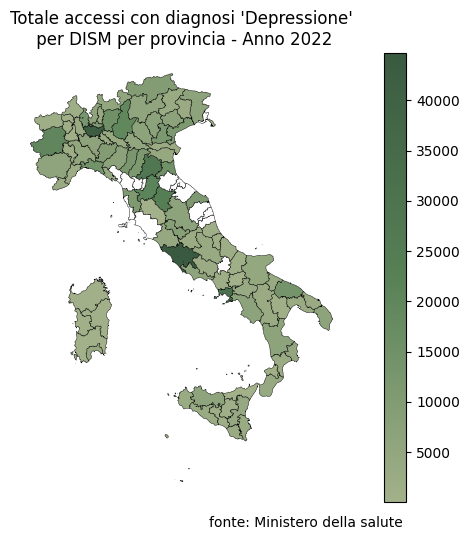

In [53]:
df_plot = df.plot(
    column="numero_accessi",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

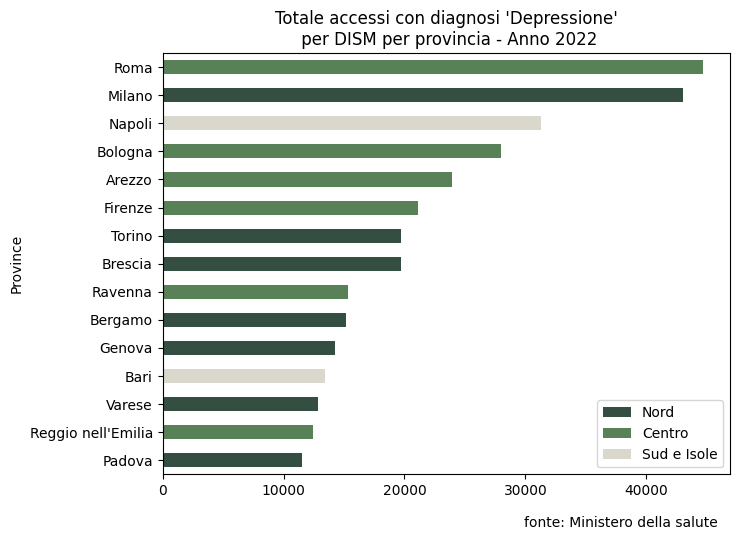

In [54]:
best_rows = df.sort_values(by=['numero_accessi'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['numero_accessi'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    y="numero_accessi",
    x="prov_name",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [55]:
best_rows

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
RM,"MULTIPOLYGON (((11.82281 42.14649, 11.82464 42...",Centro,Roma,44690.0,12.0,3724.166667
MI,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3...",Nord,Milano,43057.0,19.0,2266.157895
NA,"MULTIPOLYGON (((14.35567 41.00178, 14.35628 41...",Sud e Isole,Napoli,31277.0,10.0,3127.700000
BO,"POLYGON ((11.13161 44.56743, 11.12953 44.56816...",Centro,Bologna,27985.0,4.0,6996.250000
AR,"MULTIPOLYGON (((12.10273 43.52993, 12.09576 43...",Centro,Arezzo,23903.0,2.0,11951.500000
FI,"POLYGON ((11.20242 44.10074, 11.20259 44.10067...",Centro,Firenze,21124.0,2.0,10562.000000
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,19741.0,8.0,2467.625000
BS,"POLYGON ((10.42838 45.32070, 10.42933 45.31887...",Nord,Brescia,19700.0,12.0,1641.666667
RA,"POLYGON ((11.88393 44.57916, 11.88897 44.58038...",Centro,Ravenna,15315.0,6.0,2552.500000


In [56]:
plot_title = "Media accessi con diagnosi '{}'\n per DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

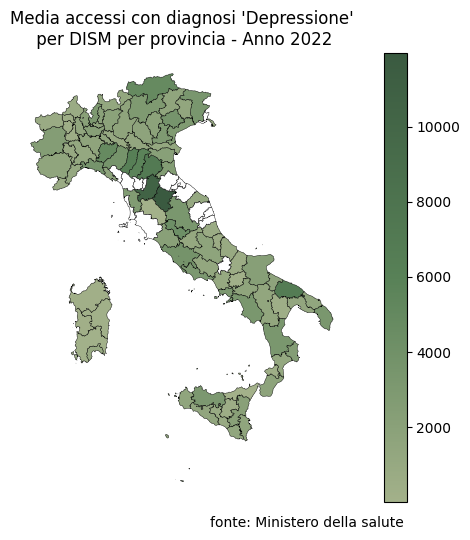

In [57]:
df_plot = df.plot(
    column="target_group_avg",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

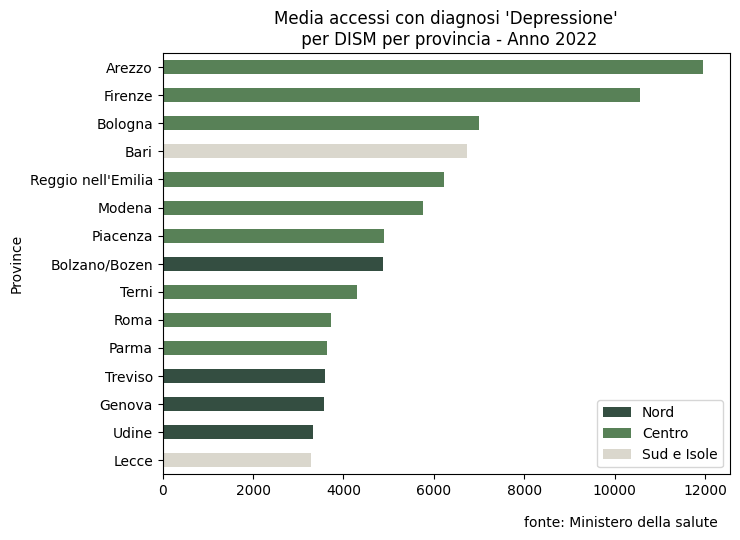

In [58]:
best_rows = df.sort_values(by=['target_group_avg'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['target_group_avg'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="target_group_avg",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [59]:
plot_title = "Numero di DISM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

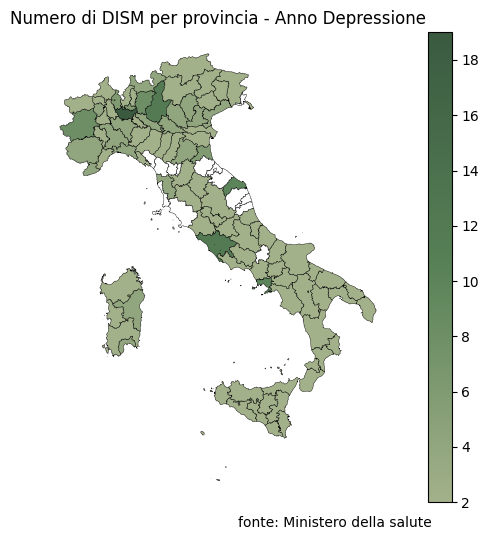

In [60]:
df_plot = df.plot(
    column="dism_count",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

Text(260, -30, 'fonte: Ministero della salute')

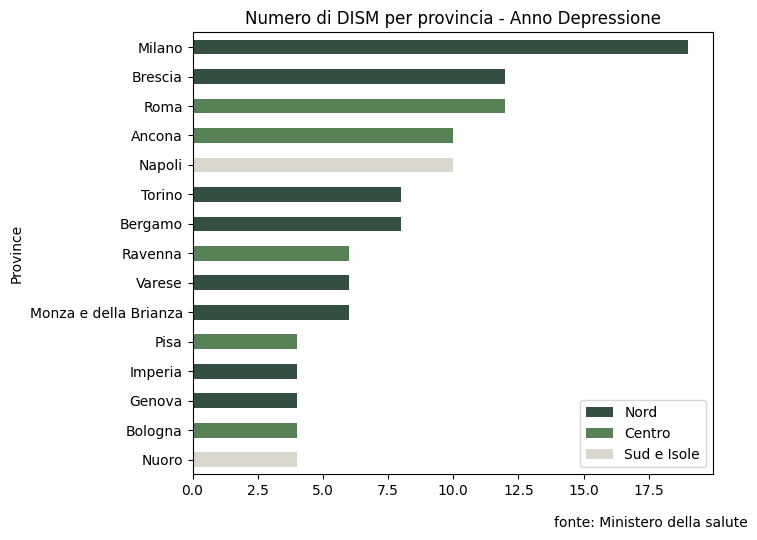

In [61]:
best_rows = df.sort_values(by=['dism_count'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['dism_count'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="dism_count",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [62]:
for i, fig_plot in enumerate(fig_plots, start=1):
    df_ = fig_plot.get("df")
    df_name = fig_plot.get("name")
    file_name = "{}/{}_{}.png".format(OUTPUT_DIR, i, df_name)
    df_.get_figure().savefig(file_name)